# **Trabajo Final grupal 2022** - **Telco Churn Classification**

#### Carga de librerias, módulos y dataset

In [1]:
# librerias para EDA
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
from seaborn.categorical import boxplot
warnings.filterwarnings('ignore')

# librerías de aprendizaje automatico
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.metrics import accuracy_score,roc_curve, auc,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition

# Librerias y modulos para redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras import layers
from keras import layers
from keras.layers.core import Dropout

In [2]:
# Verificacion de si se está en entorno de Colab o no
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)
if var_google_colab:
  #Montamos G.Drive
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)

False


In [3]:
if var_google_colab:
  # Direccion root donde está la jupyter-notebook dentro del Drive
  root_path = "/content/gdrive/My Drive/Proyecto de Ciencia de datos final/"
  # Direccion donde se guardaran las imagenes
  plot_path = root_path
  # Carga de dataset desde Colab
  dataset = pd.read_csv(root_path+'telco_churn_clusterai.csv')
else:
  # Carga de dataset desde Local
  #dataset = pd.read_csv(r'C:\Users\matis\Documents\Facultad\Ciencia de datos\TP final\telco_churn_clusterai.csv', delimiter=',',encoding='latin-1')
  dataset = pd.read_csv(r'D:\CPM\Ciencia de datos\Directorio\TP final\telco_churn_clusterai.csv', delimiter=',',encoding='latin-1')

  

## **EDA y Pre-processing**

In [4]:
# Se imprimen las dimensiones del dataset y verificacion de que se haya cargado correctamente#
print("El dataset tiene "+ str(np.shape(dataset)[0]) + " renglones y " + str(np.shape(dataset)[1]) + " columnas")
dataset.head(6)


El dataset tiene 7043 renglones y 22 columnas


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,NaN,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,NaN,No,NaN,NaN,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes
5,5,9305-CDSKC,Female,0.0,No,No,8.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,NaN,Electronic check,99.65,820.5,Yes


In [5]:
# se visualizan tipos de datos de las variables presentes
dataset.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Se ve el porcentaje de nulos por cada columna#
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Contract,1197,0.169956
MonthlyCharges,1197,0.169956
PaymentMethod,1197,0.169956
PaperlessBilling,1197,0.169956
OnlineBackup,916,0.130058
gender,916,0.130058
SeniorCitizen,916,0.130058
Partner,916,0.130058
Dependents,916,0.130058
tenure,916,0.130058


In [7]:
# se pasa TotalCharges a float
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

# se dropean samples con nulos en variable TotalCharges por ser solo 11 casos
dataset.dropna(how='any', inplace=True, subset=['TotalCharges'])
# y nulos de SeniorCitizen por no poder imputarle valores categoricos por relacion a ninguna otra variable
dataset.dropna(how='any', inplace=True, subset=['SeniorCitizen'])

# se borran duplicados por indice y por ID de cliente si los hubiera
dataset.drop_duplicates(subset=['customerID', 'Unnamed: 0'], inplace=True, keep='first')

# se eliminan variables customer id y unnamed que no aportan informacion y gender para evitar sesgo de género
dataset = dataset.drop(columns = ["customerID","Unnamed: 0", 'gender'])

# Los nulos de MonthlyCharges y tenure son completados con la media para no tener que descartar más datos
dataset['MonthlyCharges'].fillna(dataset['MonthlyCharges'].mean(), inplace = True)
dataset['tenure'].fillna(dataset['tenure'].mean(), inplace = True)

# se pasa SeniorCitizen primero a integer para quitar la componente decimal a las clases 1.0 y 0.0
# y una vez transformados en 1 y 0 se convierte a string/variable categorica para no interferir en los pairplots como v.numerico
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype(int)
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype(str)

In [8]:
# se completan vacios de PaperlessBilling en base a los valores del PaymentMethod
dataset['PaperlessBilling'].fillna(dataset['PaymentMethod'], inplace=True)

# si el PaymentMethod es 'Mailed check' se supone PaperlessBilling igual a 'No'
dataset.loc[dataset['PaperlessBilling'] == "Mailed check", 'PaperlessBilling'] = 'No'

# si el PaymentMethod pertenece al resto de las categorías entonces se supone 'Yes'
dataset.loc[dataset['PaperlessBilling'] == "Electronic check", 'PaperlessBilling'] = 'Yes'
dataset.loc[dataset['PaperlessBilling'] == "Credit card (automatic)", 'PaperlessBilling'] = 'Yes'
dataset.loc[dataset['PaperlessBilling'] == "Bank transfer (automatic)", 'PaperlessBilling'] = 'Yes'



In [9]:
# se visualizan las dimensiones del dataset luego del primer tratamiento
dataset.shape

(6117, 19)

In [10]:
# y se dropean los nulos restantes que provienen de la variable PaperlessBilling
dataset.dropna(how='any', inplace=True, subset=['PaperlessBilling'])
dataset['PaperlessBilling'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
dataset.shape

(5960, 19)

In [12]:
# se visualizan los nulos restantes
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Contract,1019,0.170973
PaymentMethod,867,0.145470
OnlineSecurity,802,0.134564
MultipleLines,792,0.132886
Dependents,780,0.130872
PhoneService,778,0.130537
OnlineBackup,774,0.129866
Partner,769,0.129027
InternetService,765,0.128356
SeniorCitizen,0,0.000000


In [13]:
dataset.shape

(5960, 19)

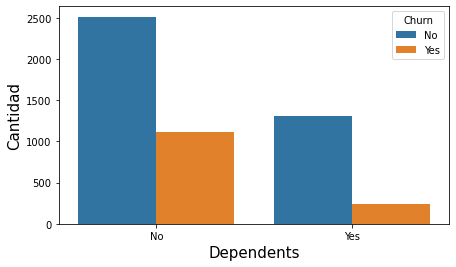

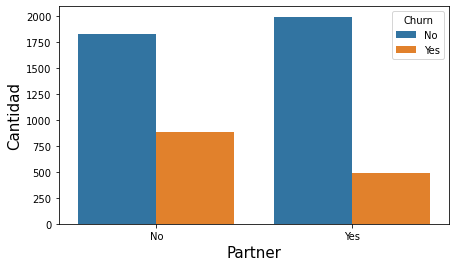

In [14]:
# se busca reducir la cantidad de nulos presentes en las variables Dependents y Partner:

plt.figure(figsize=(7,4))
# se crea countplot de librería seaborn, de Dependents segmentado por variable 'Churn'
sns.countplot(data=dataset, x='Dependents', hue='Churn')
# se definen leyendas y tamaño de etiqueta eje x
plt.xlabel("Dependents", size = 15)
# leyendas y tamaño de etiqueta de eje y
plt.ylabel("Cantidad", size = 15)
# se visualiza gráfico
plt.show()

# se define tamaño de gráfico
plt.figure(figsize=(7,4))
# se crea countplot de librería seaborn, de Partner segmentado por variable 'Churn'
sns.countplot(data=dataset, x='Partner', hue='Churn')
# se definen leyendas y tamaño de etiqueta eje x
plt.xlabel("Partner", size = 15)
# leyendas y tamaño de etiqueta de eje y
plt.ylabel("Cantidad", size = 15)
# se visualiza gráfico
plt.show()

In [15]:
# se completan vacios de Dependents y Partner por 'No' al encontrar una distribución similar entre Churn Yes/No en ambos casos,
# y por tener 'No' más cantidad de muestras para absorber los nulos y que la imputación arbitraria no afecte demasiado al modelo
dataset['Dependents'].fillna('No', inplace=True)
dataset['Partner'].fillna('No', inplace=True)

In [16]:
# se visualizan los nulos restantes
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Contract,1019,0.170973
PaymentMethod,867,0.145470
OnlineSecurity,802,0.134564
MultipleLines,792,0.132886
PhoneService,778,0.130537
OnlineBackup,774,0.129866
InternetService,765,0.128356
SeniorCitizen,0,0.000000
StreamingMovies,0,0.000000
TotalCharges,0,0.000000


In [17]:
# se borran los nulos por variable PaymentMethod y Contract por no tener manera de imputarles valores y ser variables relevantes
dataset.dropna(how='any', inplace=True, subset=['PaymentMethod', 'Contract'])
dataset.shape

(4217, 19)

In [18]:
# se visualizan los nulos restantes
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(7)

,Total,Percent
MultipleLines,567,0.134456
PhoneService,552,0.130899
OnlineSecurity,547,0.129713
OnlineBackup,530,0.125682
InternetService,527,0.124970
SeniorCitizen,0,0.000000
StreamingMovies,0,0.000000


In [19]:
dataset['MultipleLines'].unique()

array(['No', nan, 'Yes', 'No phone service'], dtype=object)

In [20]:
# se reemplaza Yes y No por 1 y 0 en MultipleLines para diferenciar con los valores de PhoneService y completar nulos en 
# los proximos pasos según relaciones entre estas variables
dataset['MultipleLines'].replace('Yes', "1", inplace = True)
dataset['MultipleLines'].replace('No', "0", inplace = True)

In [21]:
# se visualizan clases unicas en PhoneService
dataset['PhoneService'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [22]:
# al no encontrar cómo llenar nulos condicionando por valores categóricos de otras columnas, se procesa en dos pasos:
# 1. se rellenan vacios de ambas columnas relacionadas, con el valor por fila que haya en la otra variable (puede llevar valor o llevar un null)
# 2. se define criterio de imputación para los nulos que puedan ser inferidos según el valor en la variable relacionada

# 1.
# se completan vacios de PhoneService con valores de MultipleLines
dataset['PhoneService'].fillna(dataset['MultipleLines'], inplace=True)
# se completan vacios de MultipleLines con valores de PhoneService
dataset['MultipleLines'].fillna(dataset['PhoneService'], inplace=True)

# 2.
# si el valor llevado de MultipleLines a PhoneService es 'No phone service' entonces se escribe 'No' en columna PhoneService 
dataset.loc[dataset['PhoneService'] == "No phone service", 'PhoneService'] = 'No'
# si el valor llevado de MultipleLines a PhoneService es '1' entonces se escribe 'Yes' en PhoneService  
dataset['PhoneService'].replace('1', 'Yes', inplace = True)
# si el valor llevado de MultipleLines a PhoneService es '0' (no aporta info), se llena sample con NaN en PhoneService 
dataset['PhoneService'].replace('0', np.NaN, inplace = True)

# si el valor llevado de PhoneService a MultipleLines es 'No' entonces se escribe '0' en columna MultipleLines
dataset.loc[dataset['MultipleLines'] == "No", 'MultipleLines'] = '0'
# si el valor llevado de PhoneService a MultipleLines es 'Yes' (no aporta info), se llena sample con NaN en MultipleLines
dataset['MultipleLines'].replace('Yes', np.NaN, inplace = True)
# si el valor de MultipleLines es 'No phone service' se reemplaza por '0'
dataset['MultipleLines'].replace('No phone service', '0', inplace = True)

In [23]:
# se visualizan clases de PhoneService
dataset['PhoneService'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [24]:
# se visualizan clases de MultipleLines
dataset['MultipleLines'].unique()

array(['0', '1', nan], dtype=object)

In [25]:
# y se dropean los nulos restantes de ambas columnas
dataset.dropna(how='any', inplace=True, subset=['MultipleLines', 'PhoneService'])

In [26]:
# se visualizan los nulos restantes
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
OnlineSecurity,439,0.126732
InternetService,428,0.123557
OnlineBackup,423,0.122113
SeniorCitizen,0,0.000000
StreamingTV,0,0.000000


In [27]:
dataset.shape

(3464, 19)

In [28]:
# se visualizan clases de InternetService
dataset['InternetService'].unique()

array([nan, 'Fiber optic', 'DSL', 'No'], dtype=object)

In [29]:
# se definen columnas en las que se va a buscar en su interior la string 'No internet service'
mask = dataset[['OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(
    lambda x: x.str.contains("No internet service")).any(axis=1)

# se crea nueva variable en la que si en alguna de las columnas anteriores se hayó al menos 1 'No internet service',
# se imputa 'No', y si no se imputan nulos
dataset['IntServ'] = np.where(mask,'No', np.NaN)

In [30]:
# se visualizan algunas filas del dataset luego de los ultimos tratamientos
dataset.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,IntServ
1,0,No,No,34.000000,Yes,0,NaN,Yes,No,Yes,No,No,No,One year,No,Mailed check,64.890604,1889.50,No,nan
3,0,No,No,32.723216,No,0,NaN,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No,nan
5,0,No,No,8.000000,Yes,1,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650000,820.50,Yes,nan
8,0,Yes,No,28.000000,Yes,1,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800000,3046.05,Yes,nan
10,0,Yes,Yes,13.000000,Yes,0,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.950000,587.45,No,nan
15,0,Yes,No,69.000000,Yes,1,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),113.250000,7895.15,No,nan
18,0,Yes,Yes,10.000000,Yes,0,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),64.890604,528.35,Yes,nan
21,0,Yes,No,32.723216,Yes,0,NaN,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.800000,202.25,No,No
23,0,Yes,No,58.000000,Yes,1,DSL,No,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),64.890604,3505.10,No,nan
25,0,No,No,32.723216,Yes,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.300000,1530.60,No,nan


In [31]:
# se llenan nulos en InternetService con valor obtenido en columna condicional IntServ
dataset['InternetService'].fillna(dataset['IntServ'], inplace=True)

# se llenan nulos en OnlineSecurity con valor obtenido en columna condicional IntServ
dataset['OnlineSecurity'].fillna(dataset['IntServ'], inplace=True)

# se llenan nulos en OnlineBackup con valor obtenido en columna condicional IntServ
dataset['OnlineBackup'].fillna(dataset['IntServ'], inplace=True)

In [32]:
dataset.shape

(3464, 20)

In [33]:
# los nulos creados en el np.where se imputaron como string por lo que se reemplazan por nulls para unificarlos con los 
# existentes y luego dropearlos 
dataset['InternetService'].replace('nan', np.NaN, inplace = True)
dataset['OnlineSecurity'].replace('nan', np.NaN, inplace = True)
dataset['OnlineBackup'].replace('nan', np.NaN, inplace = True)

In [34]:
# se visualizan los nulos restantes
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
OnlineSecurity,348,0.100462
InternetService,346,0.099885
OnlineBackup,346,0.099885
SeniorCitizen,0,0.000000
StreamingMovies,0,0.000000


In [35]:
# se dropean nulos insalvables de las ultimas 3 variables tratadas
data = dataset.dropna(how='any', subset=['InternetService', 'OnlineSecurity', 'OnlineBackup'])

In [36]:
# se elimina variable auxiliar creada 'IntServ'
data = data.drop(columns = ['IntServ'])

In [37]:
data.shape

(2538, 19)

In [38]:
# se reemplaza 'No internet service' por 'No' para unificar con los 'No' existentes
data['OnlineSecurity'].replace('No internet service', "No", inplace = True )
data['OnlineBackup'].replace('No internet service', "No", inplace = True )
data['DeviceProtection'].replace('No internet service', "No", inplace = True )
data['TechSupport'].replace('No internet service', "No", inplace = True )
data['StreamingTV'].replace('No internet service', "No", inplace = True )
data['StreamingMovies'].replace('No internet service', "No", inplace = True )
data.head(6)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5,0,No,No,8.000000,Yes,1,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650000,820.50,Yes
8,0,Yes,No,28.000000,Yes,1,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800000,3046.05,Yes
10,0,Yes,Yes,13.000000,Yes,0,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.950000,587.45,No
15,0,Yes,No,69.000000,Yes,1,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),113.250000,7895.15,No
18,0,Yes,Yes,10.000000,Yes,0,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),64.890604,528.35,Yes
21,0,Yes,No,32.723216,Yes,0,No,No,No,No,No,No,No,One year,No,Bank transfer (automatic),19.800000,202.25,No


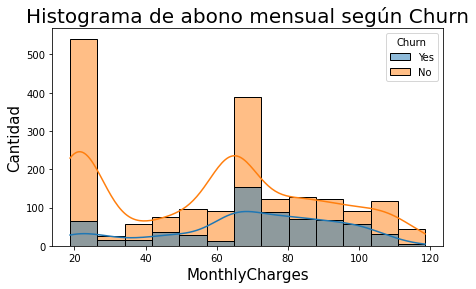

In [39]:
# se define tamaño de gráfico
plt.figure(figsize=(7,4))
# se crea histograma de MonthlyCharges segmentado por 'Churn'
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True)
# se definen leyendas y tamaño de etiqueta eje x
plt.xlabel("MonthlyCharges", size = 15)
# leyendas y tamaño de etiqueta de eje y
plt.ylabel("Cantidad", size = 15)
# leyenda del título y tamaño de fuente
plt.title('Histograma de abono mensual según Churn', size = 20)
# se visualiza gráfico
plt.show()

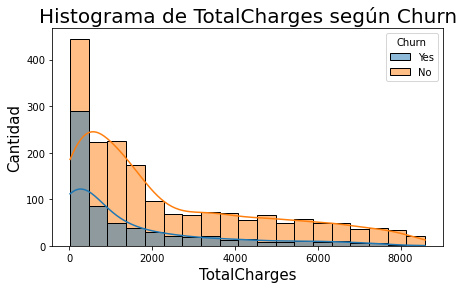

In [40]:
# se define tamaño de gráfico
plt.figure(figsize=(7,4))
# se crea histograma de TotalCharges segmentado por 'Churn'
sns.histplot(data=data, x='TotalCharges', hue='Churn', kde=True)
# se definen leyendas y tamaño de etiqueta eje x
plt.xlabel("TotalCharges", size = 15)
# leyendas y tamaño de etiqueta de eje y
plt.ylabel("Cantidad", size = 15)
# leyenda del título y tamaño de fuente
plt.title('Histograma de TotalCharges según Churn', size = 20)
# se visualiza gráfico
plt.show()

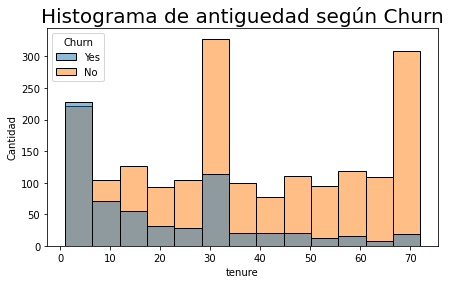

In [41]:
# se define tamaño de gráfico
plt.figure(figsize=(7,4))
# se crea histograma de antiguedad, segmentado por variable 'Churn'
sns.histplot(data=data, x='tenure', hue='Churn')
# se definen leyendas y tamaño de etiqueta eje x
plt.xlabel("tenure", size = 10)
# leyendas y tamaño de etiqueta de eje y
plt.ylabel("Cantidad", size = 10)
# leyenda del título y tamaño de fuente
plt.title('Histograma de antiguedad según Churn', size = 20)
# se visualiza gráfico
plt.show()

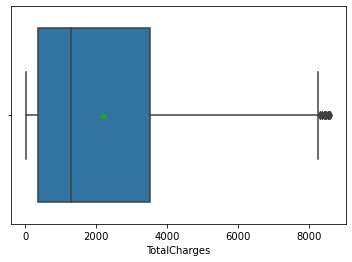

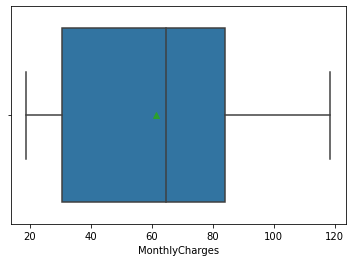

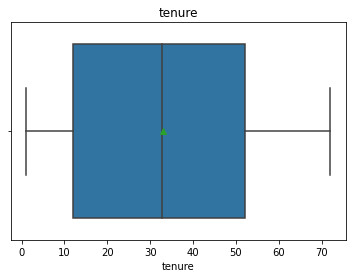

In [42]:
# se visualiza boxplot de TotalCharges
sns.boxplot(x = "TotalCharges", data = data, showmeans=True)
plt.show()

# se visualiza boxplot de MonthlyCharges
sns.boxplot(x = "MonthlyCharges", data =  data, showmeans=True)
plt.show()

# se visualiza boxplot de tenure
sns.boxplot(x = "tenure", data =  data, showmeans=True)
plt.title('tenure')
plt.show()

In [43]:
# se imprime mediana de MonthlyCharge
Mediana_MonthCh = np.quantile(data['MonthlyCharges'], 0.5)
Mediana_MonthCh

64.89060415849356

In [44]:
# se imprime mediana de antiguedad
Mediana_tenure = np.quantile(data['tenure'], 0.5)
Mediana_tenure

32.72321596686123

In [45]:
# se imprime mediana de TotalCharge
Mediana_TotalCh = np.quantile(data['TotalCharges'], 0.5)
Mediana_TotalCh

1284.2

In [46]:
# se visualiza cuantil 0.01 de la distribucion de TotalCharges
OutliersInf = np.quantile(data['TotalCharges'], 0.01)
OutliersInf

19.75

In [47]:
# se visualiza cuantil 0.99 de la distribucion de TotalCharges
OutliersSup = np.quantile(data['TotalCharges'], 0.99)
OutliersSup

8052.297000000001

In [48]:
# se eliminan outliers de la variable TotalCharges luego de ser observados en el boxplot para que no incidan en el modelo
q_low = data["TotalCharges"].quantile(0.01)
q_hi  = data["TotalCharges"].quantile(0.99)

data = data[(data["TotalCharges"] < q_hi) & (data["TotalCharges"] > q_low)]

In [49]:
data.shape

(2484, 19)

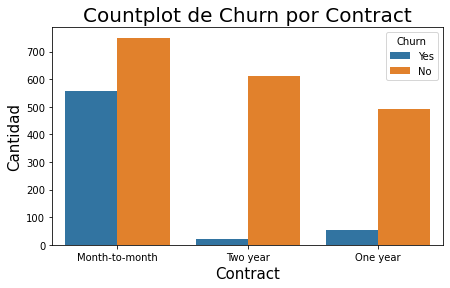

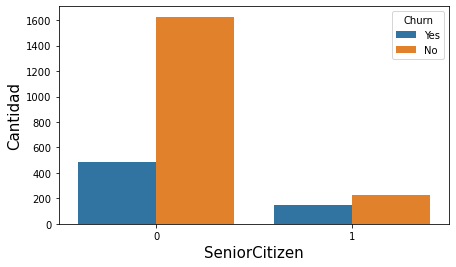

In [50]:
# se define tamaño de gráfico
plt.figure(figsize=(7,4))
# se crea countplot de Contract segmentado por variable 'Churn'
sns.countplot(data=data, x='Contract', hue='Churn')
# se definen leyendas y tamaño de etiqueta eje x
plt.xlabel("Contract", size = 15)
# leyendas y tamaño de etiqueta de eje y
plt.ylabel("Cantidad", size = 15)
# leyenda del título y tamaño de fuente
plt.title('Countplot de Churn por Contract', size = 20)
# se visualiza gráfico
plt.show()

plt.figure(figsize=(7,4))
# se crea countplot de SeniorCitizen segmentado por variable 'Churn'
sns.countplot(data=data, x='SeniorCitizen', hue='Churn')
# se definen leyendas y tamaño de etiqueta eje x
plt.xlabel("SeniorCitizen", size = 15)
# leyendas y tamaño de etiqueta de eje y
plt.ylabel("Cantidad", size = 15)
# se visualiza gráfico
plt.show()

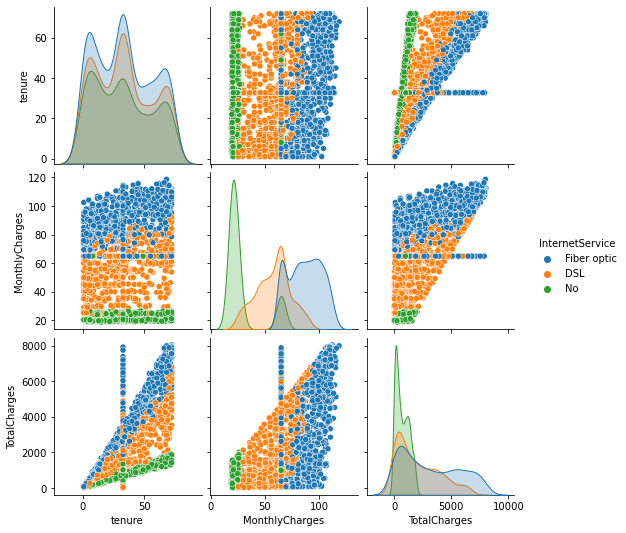

In [51]:
# se crea pairplot en seaborn pasandole dataframe y segmentación por color según variable InternetService.
sns.pairplot(data=data, hue='InternetService')
# se visualiza plot
plt.show()

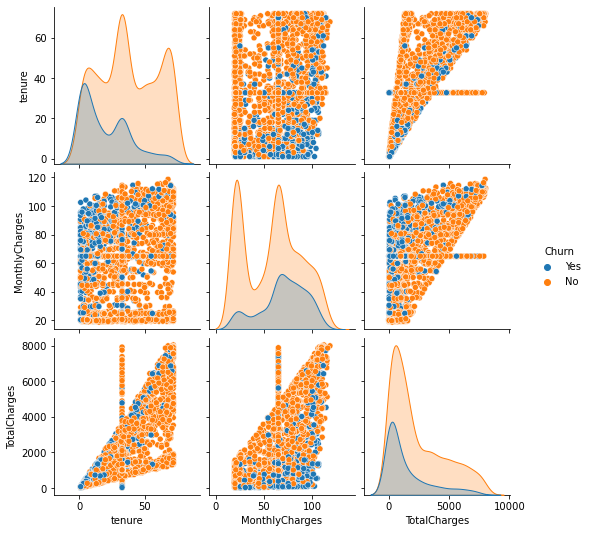

In [52]:
# se crea pairplot en seaborn pasando dataframe y segmentación por color según variable Churn.
sns.pairplot(data=data, hue='Churn')
# se visualiza plot
plt.show()

<AxesSubplot:title={'center':'Heatmap de correlaciones lineales'}>

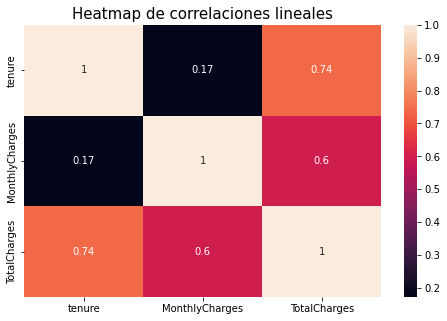

In [53]:
# Se crea y guarda matriz de correlación en variable 'diab_corr'
data_corr = data.corr(method='pearson')
# se define tamaño de gráfico
plt.figure(figsize=(8,5))
# leyenda del título y tamaño de fuente
plt.title('Heatmap de correlaciones lineales', size = 15)
# se visualiza heatmap de la matriz de correlación y con annot sus valores
sns.heatmap(data_corr, annot=True)

In [54]:
data = pd.get_dummies(data)

In [55]:
data

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
5,8.0,99.650000,820.50,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
8,28.0,104.800000,3046.05,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
10,13.0,49.950000,587.45,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,1,0
15,69.0,113.250000,7895.15,1,0,0,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
18,10.0,64.890604,528.35,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,6.0,44.400000,263.05,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7031,55.0,60.000000,3316.10,0,1,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
7032,1.0,75.750000,75.75,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
7033,38.0,64.890604,2625.25,1,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [56]:
data.shape

(2484, 39)

In [57]:
# se elimina feature Churn_No para dejar como Label solo Churn_yes [1,0]
data = data.drop(columns = ['Churn_No'])
# se verifican cantidad de variables luego de transformar variables categoricas en dummies
data.shape[1]

38

<AxesSubplot:>

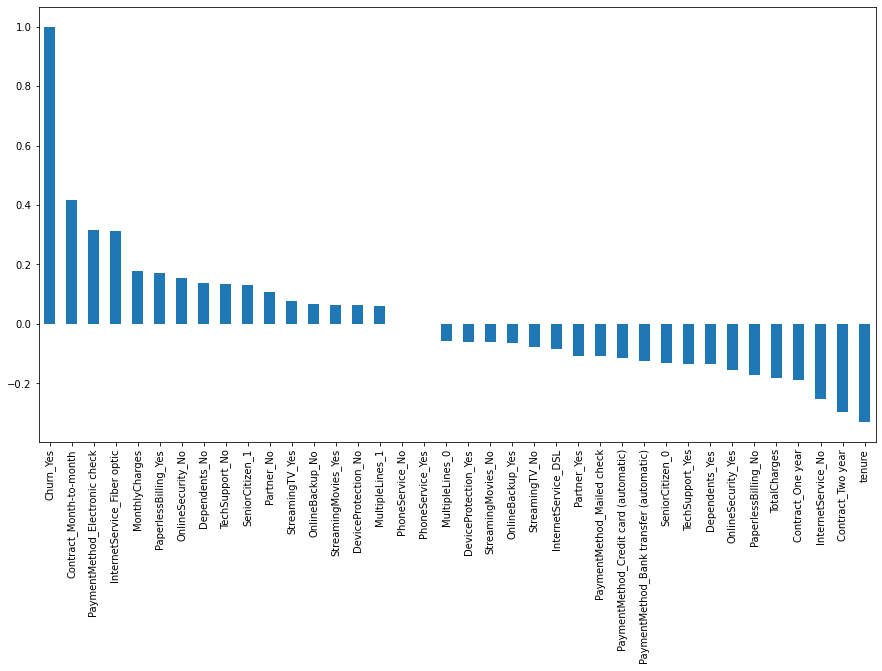

In [58]:
# se plotea grafico de features/clases mas directa e inversamente correlacionadas con Churn_yes
plt.figure(figsize=(15,8))
data.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

In [59]:
# creación de variable de labels
y = np.array(data[["Churn_Yes"]])
# se define X dropeando Churn
x = data.drop(["Churn_Yes"], axis=1)

In [60]:
# partición del (x, y) en train y test, con 75-25% de relacion respectivamente, y se asigna seed arbitraria
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=4)

In [61]:
# se separan dummies del xtrain para poder escalar valores continuos originales
xtrain_dummies = xtrain.drop(xtrain.iloc[:, 0:3], axis=1)
# se guardan valores a escalar del xtrain
xtrain_sindummies = xtrain.drop(xtrain.iloc[:, 3:38], axis=1)

In [62]:
# se separan dummies del xtest para escalar valores continuos originales
xtest_dummies = xtest.drop(xtest.iloc[:, 0:3], axis=1)
# se guardan valores a escalar del xtest
xtest_sindummies = xtest.drop(xtest.iloc[:, 3:38], axis=1)

In [63]:
xtest_dummies.head()

,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_0,MultipleLines_1,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6253,1,0,1,0,1,0,1,0,1,0,...,1,1,0,0,0,1,0,1,0,0
5018,1,0,0,1,0,1,0,1,1,0,...,0,0,0,1,0,1,0,1,0,0
216,1,0,0,1,0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
3599,1,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
6721,1,0,0,1,0,1,0,1,0,1,...,1,0,0,1,1,0,1,0,0,0


In [64]:
xtest_sindummies.head()

,tenure,MonthlyCharges,TotalCharges
6253,32.723216,44.850000,2564.95
5018,72.000000,64.890604,1379.80
216,32.723216,45.250000,3139.80
3599,45.000000,81.300000,3541.10
6721,49.000000,64.890604,3902.45


In [65]:
# se define standard scaler ajustándolo según datos del xtrain
scaler = preprocessing.StandardScaler().fit(xtrain_sindummies)

# transform a los datos del xtrain y se guarda en variable
xtrain_scal = scaler.transform(xtrain_sindummies)

# transform a los datos del xtest y se guarda en variable
xtest_scal = scaler.transform(xtest_sindummies)

# se convierten dummies de xtrain en array
xtrain_dummies = xtrain_dummies.to_numpy()
# idem xtest
xtest_dummies = xtest_dummies.to_numpy()

# se joinean dummies a xtrain y xtest ya escalados
xtrain_telco = np.concatenate((xtrain_scal,xtrain_dummies), axis=1)
xtest_telco = np.concatenate((xtest_scal,xtest_dummies), axis=1)

# se verifican cantidad de variables
xtrain_telco.shape[1]

37

## **Modelos**

#### PCA

In [66]:
# se genera modelo de PCA
pca = decomposition.PCA()
# se definen cantidad de componentes a extraer
pca.n_components = 2
# se transforman las X tomando de los datos escalados
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))
xtest_scalPCA = pd.DataFrame(pca.fit_transform(xtest_scal))
# se guardan variables de performance
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
eigenvalues = pca.explained_variance_ratio_
eigenvalues

array([0.67913333, 0.27712588])

In [67]:
print("Luego de reducir la dimensionalidad de las 3 variables numéricas a 2, se logra retener la variabilidad del dataset en un " + str(sum(eigenvalues)))

Luego de reducir la dimensionalidad de las 3 variables numéricas a 2, se logra retener la variabilidad del dataset en un 0.9562592060942252


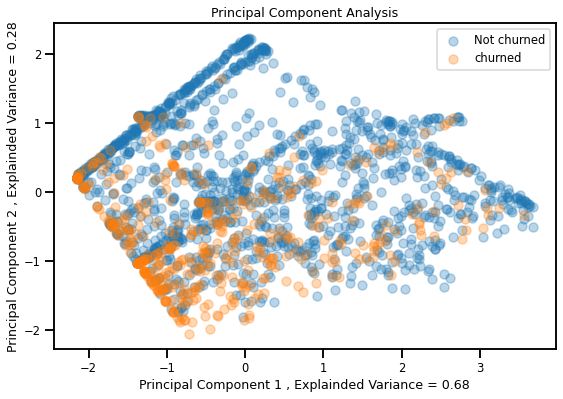

In [68]:
# se visualiza distribucion de los resultados del PCA
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[(ytrain == 0).ravel(),0],xpca.loc[(ytrain == 0).ravel(),1], alpha = 0.3, label = 'Not churned')
plt.scatter(xpca.loc[(ytrain == 1).ravel(),0],xpca.loc[(ytrain == 1).ravel(),1], alpha = 0.3, label = 'churned')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis')
plt.legend(loc='upper right')
plt.show()

In [69]:
# se joinean Componentes Principales halladas a las dummies generadas por las variables categoricas para la ejecucion en los modelos
xtrain_PCA = np.concatenate((xpca,xtrain_dummies), axis=1)
xtest_PCA = np.concatenate((xtest_scalPCA,xtest_dummies), axis=1)
# se verifican cantidad de variables
xtrain_PCA.shape[1]

36

#### SVC con kernel lineal

In [70]:
# se crea modelo Support Vector Machine - Classificator (SVC)
svc = svm.SVC()

# Hyperparametros
parameters1 = {'kernel':['linear'],
              'C':[0.001, 0.01, 1, 10, 100, 1000]}
# 
clf = GridSearchCV(svc, # modelo
                   param_grid = parameters1, # Hyperparametros
                   refit = True, # refit devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   verbose=3)
clf.fit(xtrain_telco, ytrain.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.751 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.751 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.748 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.750 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.796 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.786 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.802 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.801 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.798 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.786 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000],
                         'kernel': ['linear']},
             verbose=3)

In [71]:
# Prediction sobre las muestras de test
y_pred = clf.predict(xtest_telco)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 

In [72]:
print("Los mejores parametros del SVC linear son %s con un accuracy de %0.2f" % (clf.best_params_, clf.best_score_))

Los mejores parametros del SVC linear son {'C': 1, 'kernel': 'linear'} con un accuracy de 0.80


In [73]:
# se imprime Confusion Matrix
cm1 = confusion_matrix(ytest, y_pred)
print(cm1)

[[418  38]
 [ 72  93]]


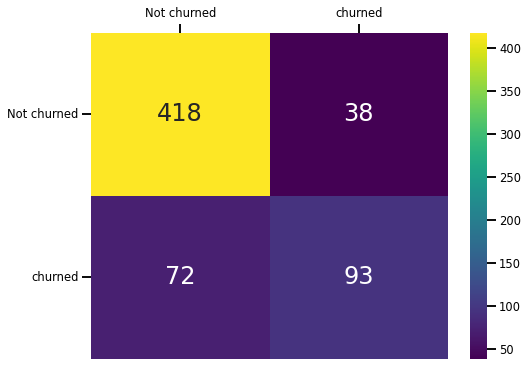

In [74]:
# Heatmap de confusion matrix
df_cm1 = pd.DataFrame(cm1, index = ['Not churned', 'churned'], columns = ['Not churned', "churned"])
plt.figure(figsize = (8,6))
ax = sns.heatmap(df_cm1, annot=True, fmt='g', cmap="viridis", annot_kws={'fontsize': 24})
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()

In [75]:
# se vuelve a probar modelo con el dataset surgido del PCA
 
clf_PCA = GridSearchCV(svc, # modelo
                   param_grid = parameters1, # Hyperparametros
                   refit = True, # refit devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   verbose=3)
# se entrena modelo
clf_PCA.fit(xtrain_PCA, ytrain.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.751 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.751 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.748 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.750 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.750 total time=   0.1s
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.796 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.783 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.786 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.798 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.798 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.777 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000],
                         'kernel': ['linear']},
             verbose=3)

In [76]:
# se realizan predicciones
y_pred_PCA = clf_PCA.predict(xtest_PCA)

In [77]:
print("Los mejores parametros del SVC linear con PCA son %s con un accuracy de %0.2f" % (clf_PCA.best_params_, clf_PCA.best_score_))

Los mejores parametros del SVC linear con PCA son {'C': 1, 'kernel': 'linear'} con un accuracy de 0.80


In [78]:
# se imprime Confusion Matrix
cm1_PCA = confusion_matrix(ytest, y_pred_PCA)
print(cm1_PCA)

[[416  40]
 [ 72  93]]


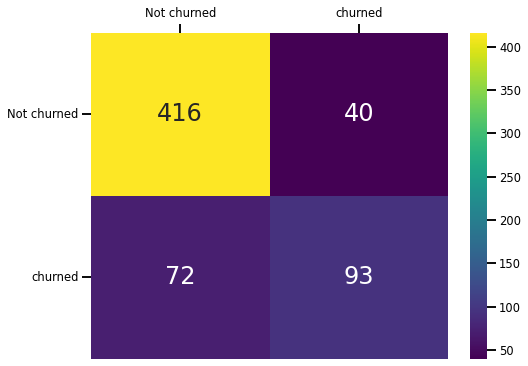

In [79]:
# Heatmap de confusion matrix
df_cm1_PCA = pd.DataFrame(cm1_PCA, index = ['Not churned', 'churned'], columns = ['Not churned', "churned"])
plt.figure(figsize = (8,6))
ax = sns.heatmap(df_cm1_PCA, annot=True, fmt='g', cmap="viridis", annot_kws={'fontsize': 24})
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()

#### SVC con kernels no lineales

In [80]:
# se definen nuevos Hyperparametros para probar otros kernels
parameters2 = {'kernel':('sigmoid', 'rbf'),
              'C':[0.001, 0.01, 1, 10, 100, 1000],
              'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
# 
clf2 = GridSearchCV(svc, # modelo
                   param_grid = parameters2, # Hyperparametros
                   refit = True, # refit devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   verbose=3)
clf2.fit(xtrain_telco, ytrain.ravel())

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.751 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.751 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.748 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.751 total time=   0.1s
[CV 2/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.751 total time=   0.1s
[CV 3/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.748 total time=   0.1s
[CV 4/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.750 total time=   0.1s
[CV 5/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.750 total time=   0.1s
[CV 1/5] END C=0.001, gamma=0.001, kernel=sigmoid;, score=0.751 total time=   0.1s
[CV 2/5] END C=0.001, gamma=0.

[CV 2/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.751 total time=   0.1s
[CV 3/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.748 total time=   0.0s
[CV 4/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 5/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.750 total time=   0.1s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.751 total time=   0.1s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.751 total time=   0.0s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.1s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 1/5] END ...C=0.01, gamma=1, kernel=sigmoid;, score=0.710 total time=   0.1s
[CV 2/5] END ...C=0.01, gamma=1, kernel=sigmoid;, score=0.708 total time=   0.1s
[CV 3/5] END ...C=0.01, gamma=1, kernel=sigmoid;, score=0.748 total time=   0.1s
[CV 4/5] END ...C=0.01, gamm

[CV 5/5] END ....C=1, gamma=100, kernel=sigmoid;, score=0.624 total time=   0.0s
[CV 1/5] END ........C=1, gamma=100, kernel=rbf;, score=0.756 total time=   0.4s
[CV 2/5] END ........C=1, gamma=100, kernel=rbf;, score=0.764 total time=   0.4s
[CV 3/5] END ........C=1, gamma=100, kernel=rbf;, score=0.759 total time=   0.3s
[CV 4/5] END ........C=1, gamma=100, kernel=rbf;, score=0.750 total time=   0.3s
[CV 5/5] END ........C=1, gamma=100, kernel=rbf;, score=0.755 total time=   0.3s
[CV 1/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.751 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.751 total time=   0.0s
[CV 3/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.748 total time=   0.0s
[CV 4/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.750 total time=   0.1s
[CV 5/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.751 total time=   0.1s
[CV 2/5] END ....C=10, gamma

[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.777 total time=   0.1s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.810 total time=   0.1s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.801 total time=   0.1s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.1s
[CV 1/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.673 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.702 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.729 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.723 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.2s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.1s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.2s
[CV 4/5] END ......C=100, ga

[CV 3/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.745 total time=   0.3s
[CV 4/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.747 total time=   0.3s
[CV 5/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.763 total time=   0.3s
[CV 1/5] END .C=1000, gamma=100, kernel=sigmoid;, score=0.595 total time=   0.0s
[CV 2/5] END .C=1000, gamma=100, kernel=sigmoid;, score=0.617 total time=   0.0s
[CV 3/5] END .C=1000, gamma=100, kernel=sigmoid;, score=0.563 total time=   0.0s
[CV 4/5] END .C=1000, gamma=100, kernel=sigmoid;, score=0.602 total time=   0.0s
[CV 5/5] END .C=1000, gamma=100, kernel=sigmoid;, score=0.624 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=100, kernel=rbf;, score=0.745 total time=   0.4s
[CV 2/5] END .....C=1000, gamma=100, kernel=rbf;, score=0.764 total time=   0.3s
[CV 3/5] END .....C=1000, gamma=100, kernel=rbf;, score=0.735 total time=   0.4s
[CV 4/5] END .....C=1000, gamma=100, kernel=rbf;, score=0.745 total time=   0.4s
[CV 5/5] END .....C=1000, ga

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('sigmoid', 'rbf')},
             verbose=3)

In [81]:
print("Los mejores parametros del SVC con non-linear kernels son %s con accuracy de %0.2f" % (clf2.best_params_, clf2.best_score_))

Los mejores parametros del SVC con non-linear kernels son {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} con accuracy de 0.80


In [82]:
# Prediction sobre las muestras de test del segundo SVC
y_pred2 = clf2.predict(xtest_telco)
print(y_pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 

In [83]:
# se imprime matriz de confusion
cm2 = confusion_matrix(ytest, y_pred2)
print(cm2)

[[422  34]
 [ 74  91]]


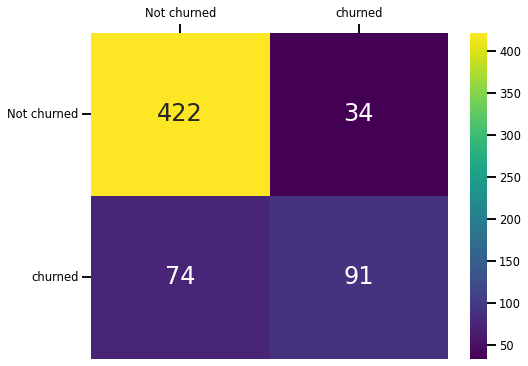

In [84]:
# Heatmap de confusion matrix
df_cm2 = pd.DataFrame(cm2, index = ['Not churned', 'churned'], columns = ['Not churned', "churned"])
plt.figure(figsize = (8,6))
ax = sns.heatmap(df_cm2, annot=True, fmt='g', cmap="viridis", annot_kws={'fontsize': 24})
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()

In [85]:
# se vuelve a probar modelo con kernels no lineales esta vez con el dataframe surgido del PCA
 
clf2_PCA = GridSearchCV(svc, # modelo
                   param_grid = parameters2, # Hyperparametros
                   refit = True, # refit devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   verbose=3)
# se entrena modelo
clf2_PCA.fit(xtrain_PCA, ytrain.ravel())

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.751 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.751 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.748 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.751 total time=   0.1s
[CV 2/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.751 total time=   0.0s
[CV 3/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.748 total time=   0.1s
[CV 4/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.750 total time=   0.1s
[CV 5/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.750 total time=   0.1s
[CV 1/5] END C=0.001, gamma=0.001, kernel=sigmoid;, score=0.751 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.

[CV 2/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.751 total time=   0.0s
[CV 3/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.748 total time=   0.1s
[CV 4/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.750 total time=   0.1s
[CV 5/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.750 total time=   0.1s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.751 total time=   0.1s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.751 total time=   0.1s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.1s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 1/5] END ...C=0.01, gamma=1, kernel=sigmoid;, score=0.705 total time=   0.1s
[CV 2/5] END ...C=0.01, gamma=1, kernel=sigmoid;, score=0.700 total time=   0.1s
[CV 3/5] END ...C=0.01, gamma=1, kernel=sigmoid;, score=0.748 total time=   0.1s
[CV 4/5] END ...C=0.01, gamm

[CV 1/5] END ........C=1, gamma=100, kernel=rbf;, score=0.756 total time=   0.3s
[CV 2/5] END ........C=1, gamma=100, kernel=rbf;, score=0.764 total time=   0.3s
[CV 3/5] END ........C=1, gamma=100, kernel=rbf;, score=0.759 total time=   0.3s
[CV 4/5] END ........C=1, gamma=100, kernel=rbf;, score=0.753 total time=   0.3s
[CV 5/5] END ........C=1, gamma=100, kernel=rbf;, score=0.755 total time=   0.3s
[CV 1/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.751 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.751 total time=   0.0s
[CV 3/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.748 total time=   0.0s
[CV 4/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 5/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.751 total time=   0.1s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.751 total time=   0.1s
[CV 3/5] END ....C=10, gamma

[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.804 total time=   0.1s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.1s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.788 total time=   0.1s
[CV 1/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.684 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.692 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.743 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.737 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.2s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.718 total time=   0.2s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.2s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.2s
[CV 5/5] END ......C=100, ga

[CV 4/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.750 total time=   0.3s
[CV 5/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.758 total time=   0.3s
[CV 1/5] END .C=1000, gamma=100, kernel=sigmoid;, score=0.592 total time=   0.0s
[CV 2/5] END .C=1000, gamma=100, kernel=sigmoid;, score=0.617 total time=   0.0s
[CV 3/5] END .C=1000, gamma=100, kernel=sigmoid;, score=0.566 total time=   0.0s
[CV 4/5] END .C=1000, gamma=100, kernel=sigmoid;, score=0.602 total time=   0.0s
[CV 5/5] END .C=1000, gamma=100, kernel=sigmoid;, score=0.618 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=100, kernel=rbf;, score=0.748 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=100, kernel=rbf;, score=0.764 total time=   0.3s
[CV 3/5] END .....C=1000, gamma=100, kernel=rbf;, score=0.735 total time=   0.3s
[CV 4/5] END .....C=1000, gamma=100, kernel=rbf;, score=0.739 total time=   0.3s
[CV 5/5] END .....C=1000, gamma=100, kernel=rbf;, score=0.755 total time=   0.3s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('sigmoid', 'rbf')},
             verbose=3)

In [86]:
# se realizan predicciones
y_pred2_PCA = clf2_PCA.predict(xtest_PCA)

In [87]:
print("Los mejores parametros del SVC non-linear con PCA son %s con un accuracy de %0.2f" % (clf2_PCA.best_params_, clf2_PCA.best_score_))

Los mejores parametros del SVC non-linear con PCA son {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'} con un accuracy de 0.80


In [88]:
# se imprime Confusion Matrix
cm2_PCA = confusion_matrix(ytest, y_pred2_PCA)
print(cm2_PCA)

[[427  29]
 [ 77  88]]


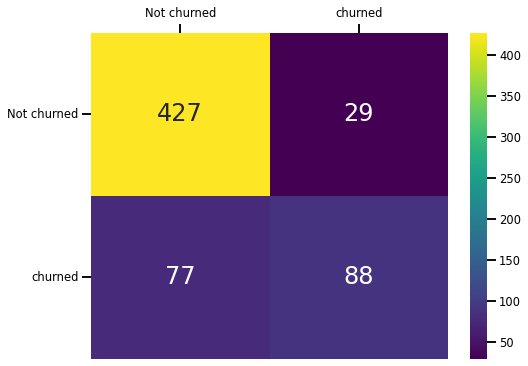

In [89]:
# Heatmap de confusion matrix
df_cm2_PCA = pd.DataFrame(cm2_PCA, index = ['Not churned', 'churned'], columns = ['Not churned', "churned"])
plt.figure(figsize = (8,6))
ax = sns.heatmap(df_cm2_PCA, annot=True, fmt='g', cmap="viridis", annot_kws={'fontsize': 24})
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()

#### Regresión logística



In [90]:
# se crea modelo de regresión logística
LRmodel = LogisticRegression()
# se entrena con datos de train
result = LRmodel.fit(xtrain_telco, ytrain)
# se realizan predicciones
ypredLR = LRmodel.predict(xtest_telco)
# se imprime accuracy
print (metrics.accuracy_score(ytest, ypredLR))

0.8260869565217391


In [91]:
# se computa y visualiza AUC
Y_proba = LRmodel.predict_proba(xtest_telco)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), Y_proba[:,1], drop_intermediate = False)
auc_value = auc(fpr1, tpr1)
print("El AUC es = " + str(auc_value))

El AUC es = 0.8635167464114832


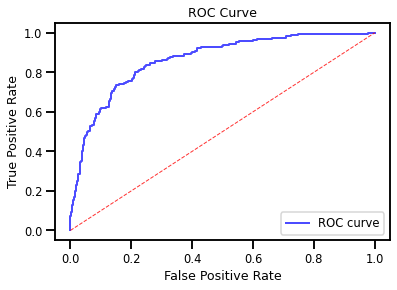

In [92]:
# se plotea curva ROC
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show()

[[416  40]
 [ 68  97]]


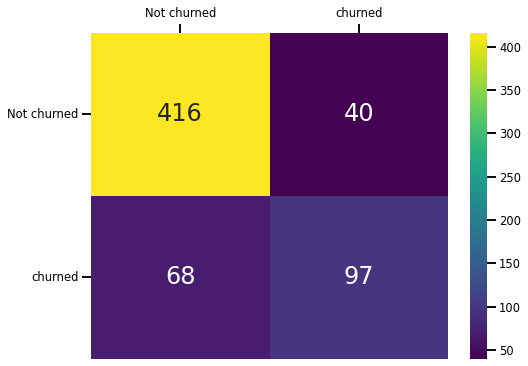

In [93]:
# se imprime Confusion Matrix
cmLR = confusion_matrix(ytest, ypredLR)
print(cmLR)

# Heatmap de confusion matrix
cm_LR = pd.DataFrame(cmLR, index = ['Not churned', 'churned'], columns = ['Not churned', "churned"])
plt.figure(figsize = (8,6))
ax = sns.heatmap(cm_LR, annot=True, fmt='g', cmap="viridis", annot_kws={'fontsize': 24})
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()

#### Regresion logística con PCA

In [94]:
# se crea modelo de regresión logística ahora usando las Componentes Principales halladas
LRmodelPCA = LogisticRegression()
# se entrena modelo con datos de train
result_PCA = LRmodelPCA.fit(xtrain_PCA, ytrain)
# se le pasan xtest para realizar predicciones
ypred_PCA_LR = LRmodelPCA.predict(xtest_PCA)
# se imprime accuracy de prediccion
print (metrics.accuracy_score(ytest, ypred_PCA_LR))

0.822866344605475


In [95]:
# se computa y visualiza AUC
Y_proba2 = LRmodelPCA.predict_proba(xtest_PCA)
fpr2, tpr2, thresholds2 = roc_curve(ytest.astype('int'), Y_proba2[:,1], drop_intermediate = False)
auc_value2 = auc(fpr2, tpr2)
print("El AUC es = " + str(auc_value2))

El AUC es = 0.8632509303561937


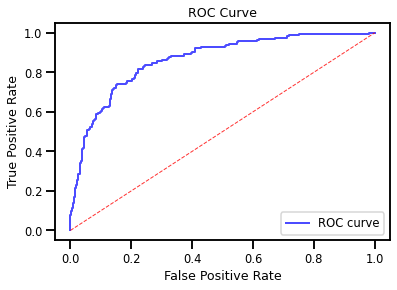

In [96]:
# se plotea curva ROC
plt.plot(fpr2, tpr2, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show()

[[413  43]
 [ 67  98]]


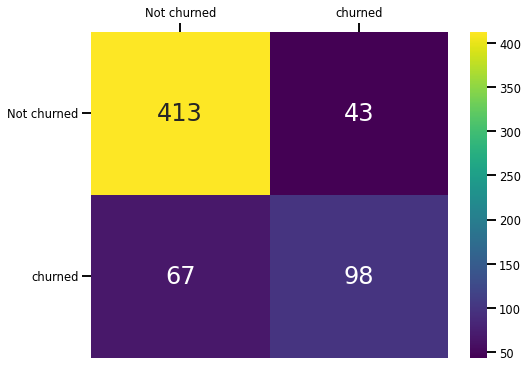

In [97]:
# se imprime Confusion Matrix
cmLR_PCA = confusion_matrix(ytest, ypred_PCA_LR)
print(cmLR_PCA)

# Heatmap de confusion matrix
cm_LR_PCA = pd.DataFrame(cmLR_PCA, index = ['Not churned', 'churned'], columns = ['Not churned', "churned"])
plt.figure(figsize = (8,6))
ax = sns.heatmap(cm_LR_PCA, annot=True, fmt='g', cmap="viridis", annot_kws={'fontsize': 24})
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()

#### Red neuronal con keras-tensorflow

In [98]:
# se define arquitectura de la red
model = Sequential([
  # Primera capa
  Dense(10,input_dim=37, activation='sigmoid', name='dense1'),
  # Dropout
  Dropout(0.5),
  # Hidden Layer
  Dense(4, activation='relu', name='dense2'), 
  # Salida de la red
  Dense(1, activation='sigmoid', name='dense3')
])

# resumen de la red
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 10)                380       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense2 (Dense)              (None, 4)                 44        
                                                                 
 dense3 (Dense)              (None, 1)                 5         
                                                                 
Total params: 429
Trainable params: 429
Non-trainable params: 0
_________________________________________________________________


In [99]:
# se define optimizador de Adam y binary Cross Entropy de Loss function
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
# se compila modelo
model.compile(optimizer= optim, loss='binary_crossentropy', metrics = ['accuracy'])

In [100]:
# Batch Size
bs = 5
# Epochs de entrenamiento
epochs_training = 50
# se entrena con datos de train
training = model.fit(xtrain_telco, ytrain, epochs=epochs_training, validation_split=0.2)

Epoch 1/50
47/47 [==============================] - 2s 17ms/step - loss: 0.7583 - accuracy: 0.4812 - val_loss: 0.6421 - val_accuracy: 0.7453
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.6638 - val_loss: 0.5927 - val_accuracy: 0.7507
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.6812 - val_loss: 0.5644 - val_accuracy: 0.7507
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5794 - accuracy: 0.7208 - val_loss: 0.5479 - val_accuracy: 0.7507
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5633 - accuracy: 0.7450 - val_loss: 0.5348 - val_accuracy: 0.7507
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7443 - val_loss: 0.5236 - val_accuracy: 0.7507
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7477 - val_loss: 0.5128 - val_accuracy: 0.7507
Epoch 8/50
47/47 [=

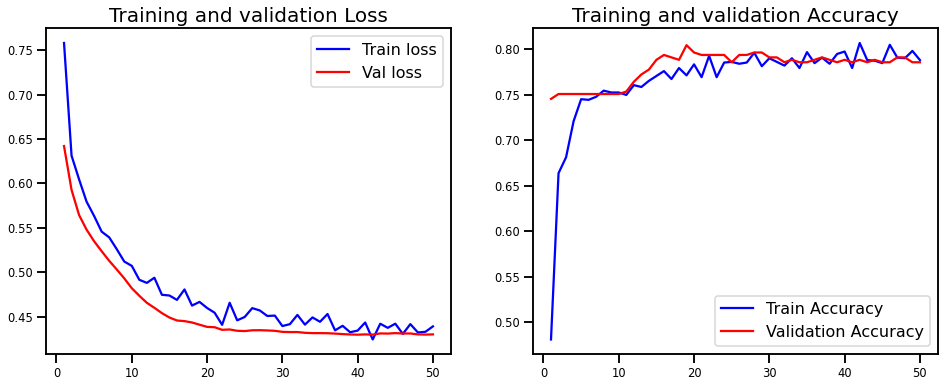

In [101]:
# se visualizan performances del historial de entrenamiento

#Loss
loss_history = training.history['loss']
val_loss_hist = training.history['val_loss']

#Accuracy
train_acc_history = training.history['accuracy']
val_acc_hist = training.history['val_accuracy']
epochs = range(1, len(loss_history) + 1)

fig, axs = plt.subplots(1,2,figsize=(16,6))
axs[0].plot(epochs, loss_history, 'b', label='Train loss')
axs[0].plot(epochs, val_loss_hist, 'r', label='Val loss')
axs[0].set_title('Training and validation Loss',fontsize=20)
axs[0].legend(fontsize=16)
axs[1].plot(epochs, train_acc_history, 'b', label='Train Accuracy')
axs[1].plot(epochs, val_acc_hist, 'r', label='Validation Accuracy')
axs[1].set_title('Training and validation Accuracy',fontsize=20)
axs[1].legend(fontsize=16)
plt.show()

In [102]:
accuracy = model.evaluate(xtrain_telco, ytrain, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.4150
Training Accuracy: 0.8073


In [103]:
accuracy = model.evaluate(xtest_telco, ytest, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Testing Score: 0.4091
Testing Accuracy: 0.8261


In [104]:
# se vuelve a probar red neuronal pero esta vez pasandole los X provenientes del PCA

# se define arquitectura de la red
model_PCA = Sequential([
  # Primera capa
  Dense(10,input_dim=36, activation='sigmoid', name='dense1'),
  # Dropout
  Dropout(0.5),
  # Hidden Layer
  Dense(4, activation='relu', name='dense2'), 
  # Salida de la red
  Dense(1, activation='sigmoid', name='dense3')
])

# resumen de la red
model_PCA.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 10)                370       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense2 (Dense)              (None, 4)                 44        
                                                                 
 dense3 (Dense)              (None, 1)                 5         
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [105]:
# se compila modelo
model_PCA.compile(optimizer= optim, loss='binary_crossentropy', metrics = ['accuracy'])
# se entrena con datos de train provenientes del PCA
training2 = model_PCA.fit(xtrain_PCA, ytrain, epochs=epochs_training, validation_split=0.2)

Epoch 1/50
47/47 [==============================] - 1s 7ms/step - loss: 0.6423 - accuracy: 0.6765 - val_loss: 0.5645 - val_accuracy: 0.7507
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7497 - val_loss: 0.5412 - val_accuracy: 0.7507
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7497 - val_loss: 0.5165 - val_accuracy: 0.7507
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7497 - val_loss: 0.4942 - val_accuracy: 0.7507
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.7497 - val_loss: 0.4812 - val_accuracy: 0.7507
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4922 - accuracy: 0.7497 - val_loss: 0.4698 - val_accuracy: 0.7507
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.7497 - val_loss: 0.4607 - val_accuracy: 0.7507
Epoch 8/50
47/47 [==

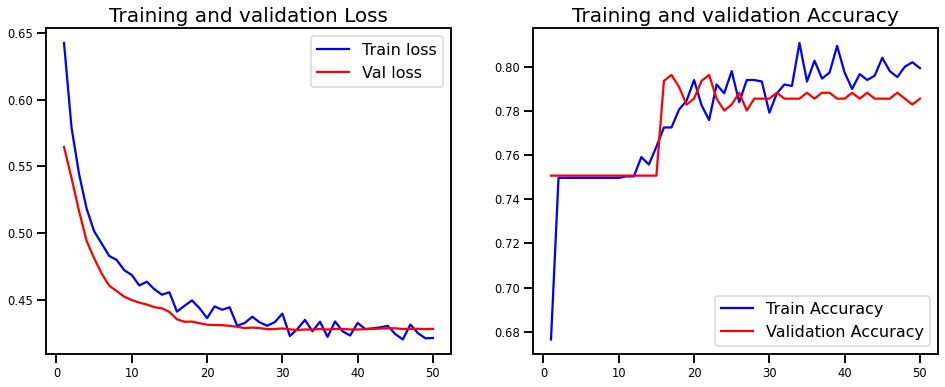

In [106]:
#Loss
loss_history2 = training2.history['loss']
val_loss_hist2 = training2.history['val_loss']

#Accuracy
train_acc_history2 = training2.history['accuracy']
val_acc_hist2 = training2.history['val_accuracy']
epochs = range(1, len(loss_history2) + 1)

fig, axs = plt.subplots(1,2,figsize=(16,6))
axs[0].plot(epochs, loss_history2, 'b', label='Train loss')
axs[0].plot(epochs, val_loss_hist2, 'r', label='Val loss')
axs[0].set_title('Training and validation Loss',fontsize=20)
axs[0].legend(fontsize=16)
axs[1].plot(epochs, train_acc_history2, 'b', label='Train Accuracy')
axs[1].plot(epochs, val_acc_hist2, 'r', label='Validation Accuracy')
axs[1].set_title('Training and validation Accuracy',fontsize=20)
axs[1].legend(fontsize=16)
plt.show()

In [107]:
accuracy2 = model_PCA.evaluate(xtrain_PCA, ytrain, verbose=False)
print("Training Score: {:.4f}".format(accuracy2[0]))
print("Training Accuracy: {:.4f}".format(accuracy2[1]))

Training Score: 0.4108
Training Accuracy: 0.8014


In [108]:
accuracy2 = model_PCA.evaluate(xtest_PCA, ytest, verbose=False)
print("Testing Score: {:.4f}".format(accuracy2[0]))
print("Testing Accuracy: {:.4f}".format(accuracy2[1]))

Testing Score: 0.4057
Testing Accuracy: 0.8164
